# Task 6.5 Unsupervised Machine Learning: Clustering

## Standard prerequisites.  Now with additional modules 'KMeans' and 'pylab' - from the libraries 'scikit-learn' and 'matplotlib', respectively - as of Exercise/Task 6.5.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import scikit-learn library and select modules for Task 6.4 (see more imports for Task 6.5, next).
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Import additional modules 'KMeans' and 'pylab' - from the libraries 'scikit-learn' and 'matplotlib', respectively - for Task 6.5
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
# (Note to self:  learn more about Python imports, particularly why we don't say, "import matplotlib.pylab as pl" or "from matplotlib import pylab ...")

In [4]:
# Import folium and JSON libraries for Task 6.3.
import folium
import json 

In [5]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [6]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [7]:
# Import itertools to help loop through lots of things.
import itertools

In [8]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [9]:
# Set a PATH variable.

In [10]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [11]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [12]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [13]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [14]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

In [15]:
# This command propts matplotlib visuals to appear in the notebook 
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Load and check our updated dataframe for Texas weather from Task 6.3.

### (There were no changes to our dataframe in Task 6.4.)

In [16]:
df = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_texas.Task-6.3.pkl'))

In [17]:
df.shape

(515813, 34)

In [18]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY', 'CO-Num-AC', 'Rain-sumavg-CO-SY-M',
       'Rain-sumavg-CO-SY', 'Snow-sumavg-CO-SY-M', 'Snow-sumavg-CO-SY',
       'GeoJSONCounty'],
      dtype='object')

# Step 2:  Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

##    Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
##    Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [19]:
# Let's create a new dataframe with just the essential numeric columns.
df_k_means = df[['LocationLat', 'LocationLng', 'StartTime(Epoch)', 'EndTime(Epoch)', 'Rain-sumavg-CO-SY', 'Snow-sumavg-CO-SY']]

In [20]:
df_k_means.shape

(515813, 6)

In [21]:
df_k_means.head()

,LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Rain-sumavg-CO-SY,Snow-sumavg-CO-SY
136752,31.8111,-106.3758,1451997600,1452004800,10.565,0.055
136753,31.8111,-106.3758,1452019500,1452023280,10.565,0.055
136754,31.8111,-106.3758,1452085800,1452093900,10.565,0.055
136755,31.8111,-106.3758,1452093900,1452095040,10.565,0.055
136756,31.8111,-106.3758,1452095040,1452097200,10.565,0.055


## The scales of these columns' values differ by several orders of magnitude.  "Standardization" is needed.
## However, it's not clear to me that any PCA (Principal Components Analysis) is needed.  We shall see.
#### For future reference, the following articles seem very helpful:
#### https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
#### http://varianceexplained.org/r/kmeans-free-lunch/
#### https://365datascience.com/tutorials/python-tutorials/pca-k-means/
#### https://365datascience.com/tutorials/statistics-tutorials/standardization/
#### https://365datascience.com/tutorials/python-tutorials/principal-components-analysis/

In [22]:
# Z-Score using pandas
for col in df_k_means.columns.tolist():
    df_k_means[[col]] = (df_k_means[[col]] - df_k_means[[col]].mean()) / df_k_means[[col]].std()

/tmp/ipykernel_2746/341357248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_means[[col]] = (df_k_means[[col]] - df_k_means[[col]].mean()) / df_k_means[[col]].std()
/tmp/ipykernel_2746/341357248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_means[[col]] = (df_k_means[[col]] - df_k_means[[col]].mean()) / df_k_means[[col]].std()
/tmp/ipykernel_2746/341357248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [23]:
df_k_means.shape

(515813, 6)

In [24]:
df_k_means.head()

,LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Rain-sumavg-CO-SY,Snow-sumavg-CO-SY
136752,0.417658,-3.921755,-1.704822,-1.704761,-1.078743,-0.30681
136753,0.417658,-3.921755,-1.704415,-1.704418,-1.078743,-0.30681
136754,0.417658,-3.921755,-1.703184,-1.703106,-1.078743,-0.30681
136755,0.417658,-3.921755,-1.703033,-1.703085,-1.078743,-0.30681
136756,0.417658,-3.921755,-1.703012,-1.703045,-1.078743,-0.30681


# Step 3:  Use the elbow technique as shown in the Jupyter notebook for this Exercise.

## The Elbow Technique

In [25]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [26]:
score = [kmeans[i].fit(df_k_means).score(df_k_means) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3094871.999997992,
 -2186568.697884688,
 -1836265.8983443847,
 -1611233.2741297667,
 -1417795.5990945357,
 -1273211.8613227538,
 -1141599.3227333555,
 -1040661.3034090934,
 -964342.0099757395]

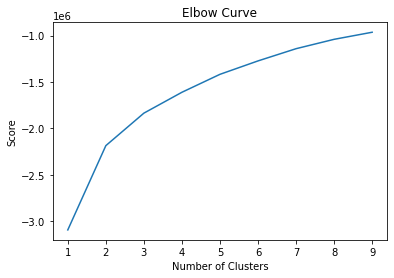

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Step 4:  Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
## Explain why you chose that number in a markdown cell.

### Answer:  it looks like the graph smooths out mostly at 2, but there is also a slight additional smoothing at 3.
### I will try 3, first.

# Step 5:  Run the k-means algorithm.

## First, we will try for three clusters.

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [29]:
# Fit the k-means object to the data.

kmeans.fit(df_k_means)

KMeans(n_clusters=3)

# Step 6:  Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [30]:
df_k_means['clusters-3'] = kmeans.fit_predict(df_k_means)

/tmp/ipykernel_2746/3735258874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_means['clusters-3'] = kmeans.fit_predict(df_k_means)


In [31]:
df_k_means.head()

,LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Rain-sumavg-CO-SY,Snow-sumavg-CO-SY,clusters-3
136752,0.417658,-3.921755,-1.704822,-1.704761,-1.078743,-0.30681,0
136753,0.417658,-3.921755,-1.704415,-1.704418,-1.078743,-0.30681,0
136754,0.417658,-3.921755,-1.703184,-1.703106,-1.078743,-0.30681,0
136755,0.417658,-3.921755,-1.703033,-1.703085,-1.078743,-0.30681,0
136756,0.417658,-3.921755,-1.703012,-1.703045,-1.078743,-0.30681,0


In [32]:
df_k_means['clusters-3'].value_counts()

2    223141
1    217188
0     75484
Name: clusters-3, dtype: int64

## This looks like two clusters of nearly identical size, plus a third cluster that is only about one-third that size.

# Step 7:  Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

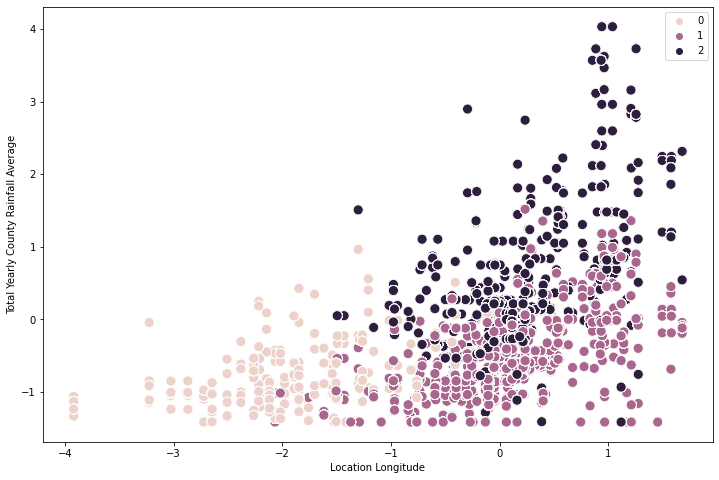

In [33]:
# Plot the clusters for LONGITUDE and yearly RAINFALL average.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k_means['LocationLng'], y=df_k_means['Rain-sumavg-CO-SY'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location Longitude') # Label x-axis.
plt.ylabel('Total Yearly County Rainfall Average') # Label y-axis.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.5-kmeans-cluster-scatter-longitude-vs-rainfall.png'), facecolor='white', bbox_inches='tight')
plt.show()

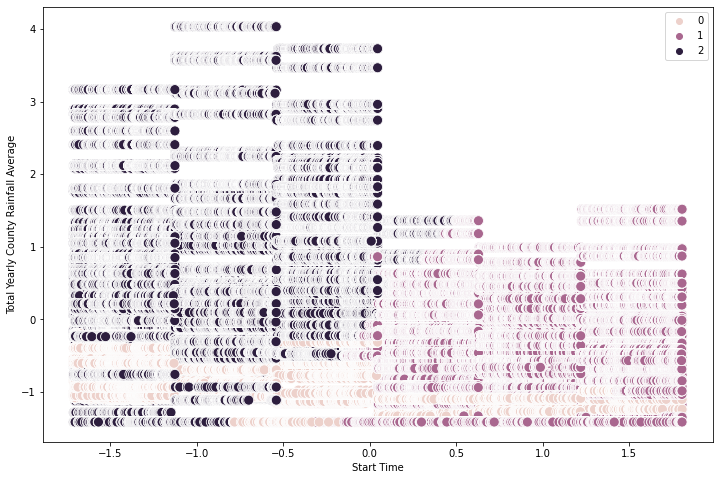

In [34]:
# Plot the clusters for TIME and yearly RAINFALL average.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k_means['StartTime(Epoch)'], y=df_k_means['Rain-sumavg-CO-SY'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Time') # Label x-axis.
plt.ylabel('Total Yearly County Rainfall Average') # Label y-axis.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.5-kmeans-cluster-scatter-time-vs-rainfall.png'), facecolor='white', bbox_inches='tight')
plt.show()

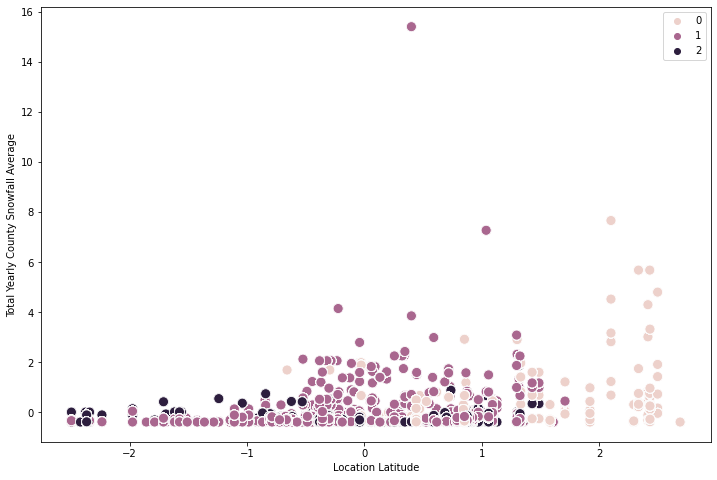

In [35]:
# Plot the clusters for LATITUDE and yearly SNOWFALL average (Snow-sumavg-CO-SY),
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k_means['LocationLat'], y=df_k_means['Snow-sumavg-CO-SY'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location Latitude') # Label x-axis.
plt.ylabel('Total Yearly County Snowfall Average') # Label y-axis.
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.5-kmeans-cluster-scatter-latitude-vs-snowfall.png'), facecolor='white', bbox_inches='tight')
plt.show()

# Step 8:  Discuss how and why the clusters make (or do not make) sense.

## The first plot, for the clusters of LONGITUDE and yearly RAINFALL average, seems to make sense.  Towards the lower end of the longitude range (i.e. to the west), we have both the lowest rainfall averages and the fewest readings (i.e. the airport locations - where the weather events are reported - are more sparse).  Interestingly, the two larger clusters to the east appear to show a difference in the rainfall averages:  perhaps we need to combine another factor (such as frequency of particular events besides rain) to explain this.
## The second plot, for the clusters of TIME (from the StartTime(Epoch) column) and yearly RAINFALL average, is tricky.  It shows the smallest cluster (corresponding to locations to the west from the previous plot) interspersed among the larger two clusters, which might indicate we do not have very good clustering for it.  However, the two larger clusters show a greater distinction from each other, with one cluster appearing almost exclusively to the left (i.e. earlier in time) - as well as a broader range of rainfall averages - and the other cluster appearing almost exclusively to the right (i.e. later) - and with much lower rainfall avarages.  I'm not sure what might explain this:  it gives me the impression that the readings from some airports were phased out over time, with readings from other (drier) airports taking their place, but this does not seem very plausible en masse.  In my background reading, I learned that new generations of meterological equipment do get phased in over time, but I'm not sure that is a plausible explanation over such a short timescale (less than three and a half years).  *Could it be an artifact of the standardization process??*
## The third plot, for the clusters of LATITUDE and yearly SNOWFALL average, shows essentially total overlap (i.e. no difference) between the two larger clusters, which makes sense, because very little snow is expected at their lower latitudes.  The smaller cluster (which is both more westerly and more northerly) shows at least partial differentiation with some of its northern-most datapoints corresponding to higher snowfall totals, but it's not a very clean separation from the other two.

# Step 9:  Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [36]:
df_k_means.loc[df_k_means['clusters-3'] == 2, 'cluster'] = 'dark purple'
df_k_means.loc[df_k_means['clusters-3'] == 1, 'cluster'] = 'purple'
df_k_means.loc[df_k_means['clusters-3'] == 0, 'cluster'] = 'pink'

/tmp/ipykernel_2746/311051992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_means.loc[df_k_means['clusters-3'] == 2, 'cluster'] = 'dark purple'


In [37]:
df_k_means.columns

Index(['LocationLat', 'LocationLng', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Rain-sumavg-CO-SY', 'Snow-sumavg-CO-SY', 'clusters-3', 'cluster'],
      dtype='object')

In [38]:
df_k_means.groupby('cluster').agg({'LocationLat':['mean', 'median'], 
                         'LocationLng':['mean', 'median'], 
                         'StartTime(Epoch)':['mean', 'median'], 
                         'Rain-sumavg-CO-SY':['mean', 'median'],
                          'Snow-sumavg-CO-SY':['mean', 'median']})

LocationLat           LocationLng           StartTime(Epoch)  \
                   mean    median        mean    median             mean   
cluster                                                                    
dark purple   -0.185191 -0.231856    0.329149  0.278422        -0.840438   
pink           0.994091  0.741971   -1.763270 -1.758703        -0.122199   
purple        -0.155230 -0.216834    0.274656  0.235243         0.905945   

                      Rain-sumavg-CO-SY           Snow-sumavg-CO-SY            
               median              mean    median              mean    median  
cluster                                                                        
dark purple -0.876349          0.687973  0.482391         -0.271414 -0.383552  
pink        -0.138263         -0.765199 -0.885335          0.300510 -0.230069  
purple       0.877095         -0.440884 -0.514203          0.174411 -0.313787

In [39]:
df_k_means.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_k_means.Task-6.5.pkl'))

## Discussion of findings:
## The Purple and Dark Purple are the two larger groups of comparable size, while the Pink group is the much smaller group.
## The Purple group is somewhat more northerly and easterly than the Dark Purple group, while the Pink group is more to the north and west than either of them.
## There seem to be significant differences in the times for the groups' measurements, with Purple being much earlier than Pink, and Dark Purple being much later, but I suspect this to be an artifact of the standardization process.
## As mentioned in the discussion of the first plot, the Pink group has the lowest rainfall, but there is also a difference between the other two groupsm, with Purple having significantly higher amounts than Dark Purple.
## For snowfall, the Purple and Dark Purple groups are nearly identical in their medians, but the Dark Purple group actually appears closer to the Pink group for its mean.  The Pink group has both a higher mean and median than either of the others - as noted earlier, it has some clear separation with higher latitude and snowfall numbers - but the separation from the Dark Purple group is not complete; the earlier plot shows some mixing between the groups, and the closer proximity of mean values between the Pink and Dark Purple groups would seem to reflect this.

# Step 10:  Propose what these results could be useful for in future steps of an analytics pipeline.

## The clustering results are not as simple as one might like.
## 1) On the one hand, the clusters have some intermingling, which is an indication that the variables being examined do not have strong correlations (and that is not surprising, given previous results in this Achievement).
## 2) On the other hand, for the two larger clusters sharing strong overlap in latitude and longitude, to have such striking differences in StartTime and yearly Rainfall averages, raises concerns as to how the data was collected or whether we're not analyzing it correctly.
## I'm hopeful that the next Exercise on time series will provide additional tools and methds to dig deeper into our Time columns, and find stronger correlations for point 1), or at least solve the mystery of point 2).  